### Подключение библиотек и скриптов

In [82]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [85]:
PREPARED_DATASET_PATH = 'housing_prepared.csv'
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
SCALER_FILE_PATH = 'scaler.pkl'
MODEL_FILE_PATH = 'model.pkl' 

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1**, **Ecology_2**, **Ecology_3** - экологические показатели местности
* **Social_1**, **Social_2**, **Social_3** - социальные показатели местности
* **Healthcare_1**, **Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1**, **Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [86]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [87]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [88]:
 df.info()
# мы видим что пропуск данных есть только в колонках: LifeSquare(7887) и Healthcare_1 (5202)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [89]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [90]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [91]:
# устанавливаем колонку id  как индекс у данных train
df.set_index("Id", inplace=True)

In [92]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [93]:
# устанавливаем колонку id  как индекс у данных train
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [94]:
df_test.set_index("Id", inplace=True)
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

### Анализ целевой переменной

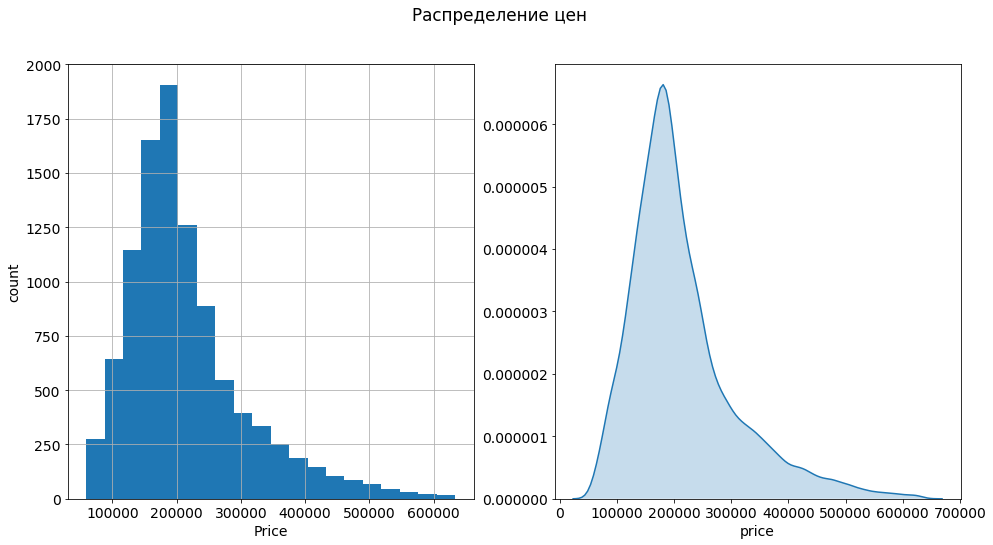

In [96]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('price')

plt.suptitle('Распределение цен')
plt.show()

In [97]:
# Вывод Среднего , медианы и моды Price
price_mean = round(df['Price'].mean(), 2)
price_median = df['Price'].median()
price_mode = df['Price'].mode()[0]
print(pd.DataFrame({'price_mean':[price_mean], 'price_median': [price_median], 'price_mode' :[price_mode]}))

   price_mean   price_median    price_mode
0   214138.86  192269.644879  59174.778028


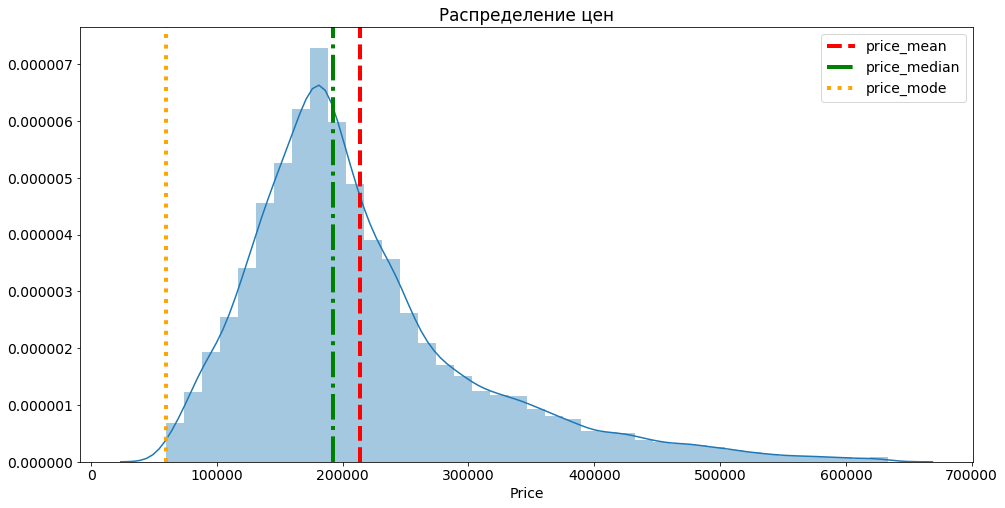

In [98]:
# Мода Price нам не интересна так как цены все разные  
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=40)

plt.axvline(price_mean, 0, 1, label='price_mean', c='red', linestyle="--",linewidth=4)
plt.axvline(price_median, 0, 1, label='price_median', c='green', linestyle="-.",linewidth=4)
plt.axvline(price_mode, 0, 1, label='price_mode', c='orange', linestyle=":",linewidth=4)


plt.title('Распределение цен')
plt.legend()
plt.show()

In [99]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

**Количественные признаки**

In [141]:
df_num_features = df.select_dtypes(include=['float64','int64'])
df_num_features.corr()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
DistrictId,1.000000,0.071618,-0.026356,-0.054248,0.190707,-0.120242,-0.148834,-0.201089,0.064976,0.246499,0.167546,0.136072,0.304208,0.305605,0.174019,0.265173
Rooms,0.071618,1.000000,0.662776,0.500055,0.115109,-0.000870,-0.029659,-0.038236,-0.032573,0.075793,0.071153,0.012681,0.042560,0.063844,0.053430,0.550182
Square,-0.026356,0.662776,1.000000,0.774053,0.110963,0.114630,0.081263,0.180209,-0.064576,-0.070830,-0.043266,0.035165,-0.039848,-0.022524,0.021293,0.520022
LifeSquare,-0.054248,0.500055,0.774053,1.000000,0.048847,0.096700,0.083513,0.175410,-0.060129,-0.132201,-0.100527,0.071348,-0.027004,-0.058494,0.015136,0.348637
KitchenSquare,0.190707,0.115109,0.110963,0.048847,1.000000,-0.010121,0.138190,0.166659,0.021558,0.285993,0.261897,-0.059551,0.098546,0.158527,0.080684,0.255732
Floor,-0.120242,-0.000870,0.114630,0.096700,-0.010121,1.000000,0.418963,0.284831,-0.016155,-0.045125,-0.016778,-0.002277,-0.138105,-0.065403,0.024209,0.128529
HouseFloor,-0.148834,-0.029659,0.081263,0.083513,0.138190,0.418963,1.000000,0.393400,-0.004432,-0.020910,0.007061,-0.008221,-0.144076,-0.068239,0.026272,0.088013
HouseYear,-0.201089,-0.038236,0.180209,0.175410,0.166659,0.284831,0.393400,1.000000,-0.066255,-0.047520,0.014006,-0.049259,-0.205187,-0.115973,-0.001699,0.037049
Ecology_1,0.064976,-0.032573,-0.064576,-0.060129,0.021558,-0.016155,-0.004432,-0.066255,1.000000,0.026346,0.009139,-0.124222,-0.044129,0.030666,-0.076968,-0.058716
Social_1,0.246499,0.075793,-0.070830,-0.132201,0.285993,-0.045125,-0.020910,-0.047520,0.026346,1.000000,0.955988,0.023648,0.077276,0.524816,0.526183,0.263109


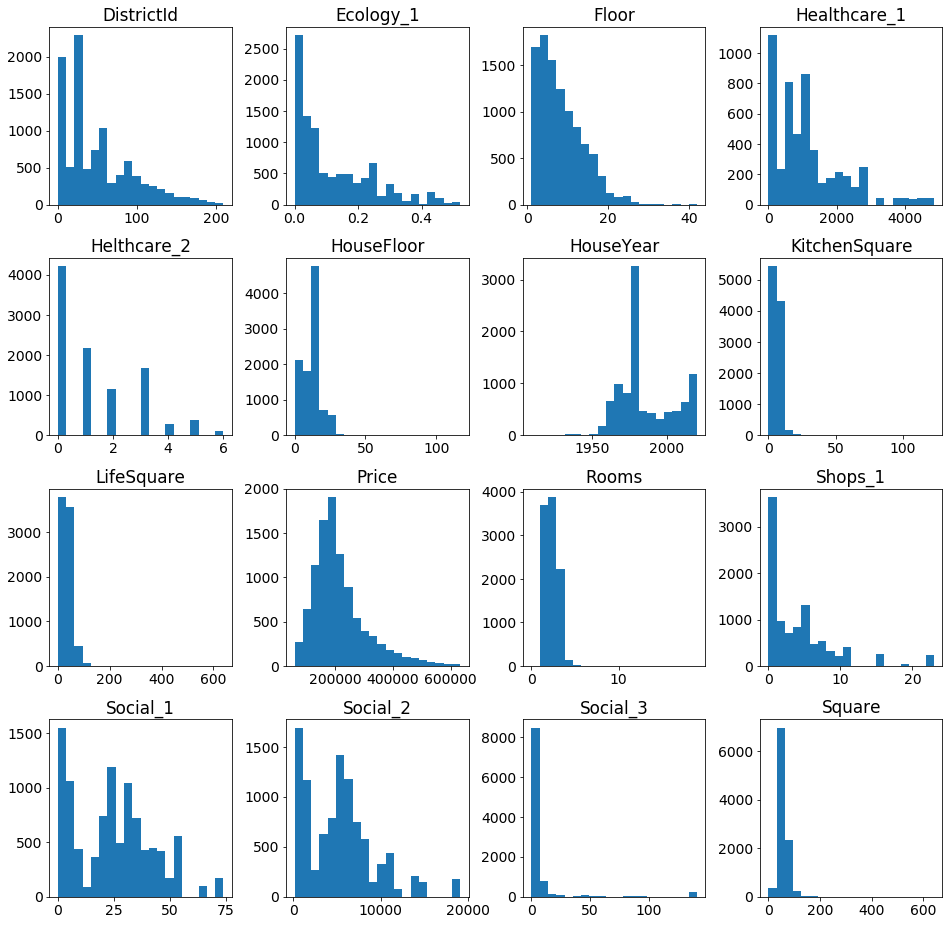

In [142]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [102]:
df.LifeSquare.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

(array([7.886e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.70619419e-01, 7.48392770e+02, 1.49641492e+03, 2.24443707e+03,
        2.99245922e+03, 3.74048137e+03, 4.48850353e+03, 5.23652568e+03,
        5.98454783e+03, 6.73256998e+03, 7.48059213e+03]),
 <a list of 10 Patch objects>)

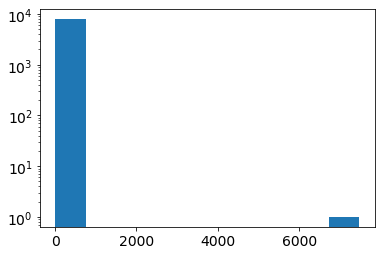

In [103]:
# вывод гистоuраммы LifeSquare .котрая показывает выброс значения
plt.hist(df['LifeSquare'], log=True)

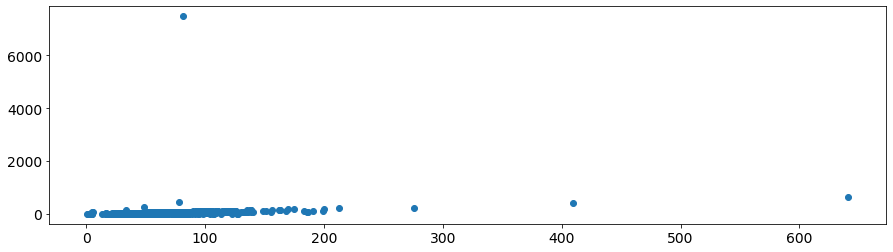

In [104]:
# посмотрим насколько коррелируют  колонки Square и LifeSquare

#df_notNan_ls
plt.rcParams['figure.figsize'] = 15, 4
plt.scatter(df['Square'],df['LifeSquare'])

In [105]:
df1=df.copy()

In [106]:
# на графике мы видим выброс ОШИБОЧНЫЙ ( скорей всего опечатка) по колонке LifeSquare 
# , т.к. общая площать  81.694417 а жилая 7480.592129

df[df['LifeSquare']>6000]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366


In [107]:
# заменим его на 74.80
df.loc[16550, 'LifeSquare']=74.80
df.loc[16550, :]

DistrictId              27
Rooms                    3
Square             81.6944
LifeSquare            74.8
KitchenSquare            1
Floor                    9
HouseFloor              17
HouseYear             2016
Ecology_1        0.0176471
Ecology_2                B
Ecology_3                B
Social_1                 2
Social_2               469
Social_3                 0
Healthcare_1           NaN
Helthcare_2              0
Shops_1                  0
Shops_2                  B
Price               217357
Name: 16550, dtype: object

In [108]:
# и удалим некорректное значение (выброс > 6000) по колонке LifeSquare а также оставим NAN, чтобы из позже обучить
# df_corrected=df[np.logical_or(df['LifeSquare']<6000, np.isnan(df['LifeSquare']))]
# df_corrected.shape


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


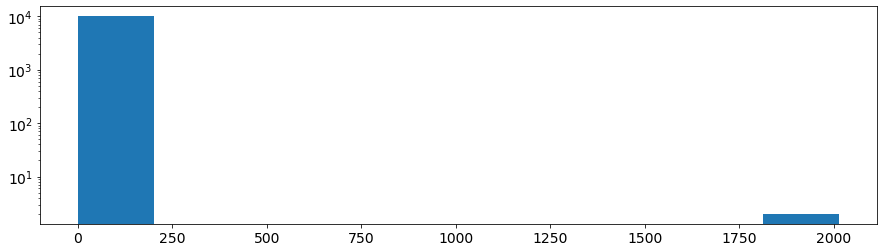

In [109]:
# по гистонрамма выше мы видим также выброс по колонке  KitchenSquare
# вывод гистоuраммы LifeSquare .котрая показывает выброс значения
plt.hist(df['KitchenSquare'], log=True)

df[df['KitchenSquare']>250]


In [110]:
# тоже видим 2 ошибочных выброса , хотя общая до 50 квадратов. Похоже на год а на на площать
# вычисляем медиану длв квартир от 40 до 50 квадратов
KitchenSquare_40_median=df[(df['Square']>40) & (df['Square']<50) &  (df['KitchenSquare']<250)].median()['KitchenSquare']
KitchenSquare_40_median

5.0

In [114]:
# в наборе присутствуют данные в которых кухня больне общей площади. 
df[df['KitchenSquare']>df['Square']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,


In [116]:
# удаляем их.
df=df.drop(df[(df['KitchenSquare'])>df['Square']].index)


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370


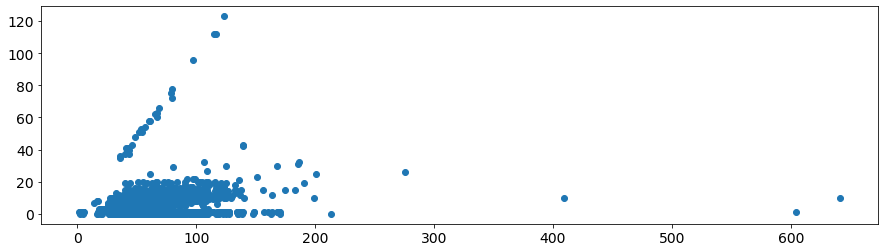

In [118]:
# посмотрим насколько коррелируют  колонки Square и KitchenSquare
#df_notNan_ls
plt.rcParams['figure.figsize'] = 15, 4
plt.scatter(df['Square'],df['KitchenSquare'])

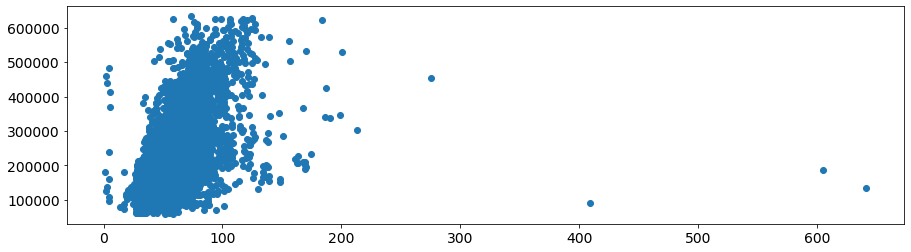

In [119]:
# посмотрим насколько коррелируют  колонки Square и цена
#df_notNan_ls
plt.rcParams['figure.figsize'] = 15, 4
plt.scatter(df['Square'],df['Price'])

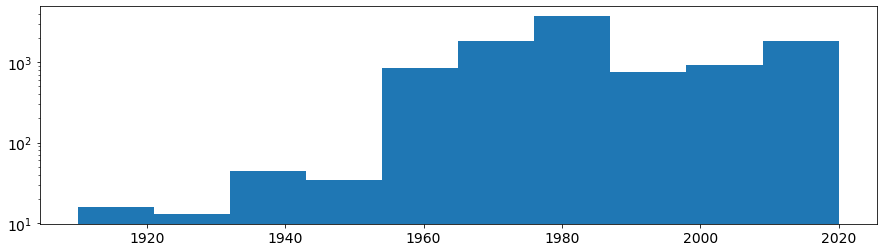

In [140]:
plt.hist(df['HouseYear'], log=True)
# убираем даты заведома неправильные > 2020
df=df.drop(df[(df['HouseYear'])>2020].index)

In [60]:
df[(df['Square']>40) & (df['Square']<50) &  (df['KitchenSquare']>250)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14656,62,1.0,47.100719,46.44796,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207


## заполнение пропущенных ячеек  колонки LifeSquare
 

In [ ]:
# в колонке LifeSquare незаполнены более 800 колонок. попытаемся их заполнить

In [120]:
# columns_ls это колонки , которые будут учавствовать в обучении LifeSquare
columns_ls =['DistrictId', 'Rooms','Square','KitchenSquare','HouseFloor', 'HouseYear']

In [143]:
# df_ls это датасет  train с ненулевыми значениями в колонке LifeSquare (а также там удален некорректный 1 выброс)
df_notNan_ls=df[df['LifeSquare'].notnull()]
df_notNan_ls.shape

(7881, 19)

In [144]:
X=df_notNan_ls[columns_ls]
X

,DistrictId,Rooms,Square,KitchenSquare,HouseFloor,HouseYear
Id,,,,,,
14038,35,2.0,47.981561,6.0,9.0,1969
15053,41,3.0,65.683640,8.0,9.0,1978
4765,53,2.0,44.947953,0.0,12.0,1968
5809,58,2.0,53.352981,9.0,17.0,1977
10783,99,1.0,39.649192,7.0,12.0,1976
...,...,...,...,...,...,...
48,13,3.0,80.631333,10.0,14.0,1999
77,32,2.0,50.401785,5.0,5.0,1968
6159,18,1.0,41.521546,9.0,13.0,2000


In [145]:
y=df_notNan_ls['LifeSquare']
y

Id
14038    29.442751
15053    40.049543
4765     29.197612
5809     52.731512
10783    23.776169
           ...    
48       48.899083
77       30.476203
6159     20.539216
5400     33.840147
6306     21.157874
Name: LifeSquare, Length: 7881, dtype: float64

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)
#X_scaled=X
X_scaled=pd.DataFrame(X_scaled, columns=columns_ls)
X_scaled

,DistrictId,Rooms,Square,KitchenSquare,HouseFloor,HouseYear
0,0.167464,0.105263,0.073203,0.048780,0.076923,0.536364
1,0.196172,0.157895,0.100866,0.065041,0.076923,0.618182
2,0.253589,0.105263,0.068463,0.000000,0.102564,0.527273
3,0.277512,0.105263,0.081597,0.073171,0.145299,0.609091
4,0.473684,0.052632,0.060182,0.056911,0.102564,0.600000
...,...,...,...,...,...,...
7876,0.062201,0.157895,0.124224,0.081301,0.119658,0.809091
7877,0.153110,0.105263,0.076985,0.040650,0.042735,0.527273
7878,0.086124,0.052632,0.063108,0.073171,0.111111,0.818182
7879,0.358852,0.105263,0.066360,0.065041,0.042735,0.463636


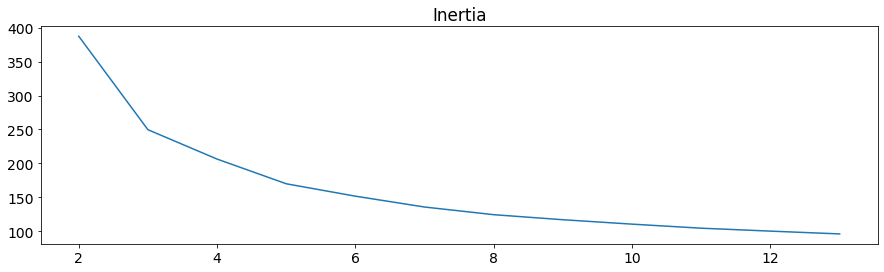

In [147]:
# подбираем количество кластеров
from sklearn.cluster import KMeans
inertias = []

for i in range(2, 14):
    temp_model = KMeans(n_clusters=i, random_state=50)
    temp_model.fit(X_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 14), inertias)

plt.title('Inertia')

plt.show()

In [148]:
# видим что при 6 кластерах инерция сильно уменьшается
model = KMeans(n_clusters=6, random_state=100)
X_labels = model.fit_predict(X_scaled)

print(X_labels)

[4 2 2 ... 1 5 0]


Text(0.5, 1.0, 'Train data')

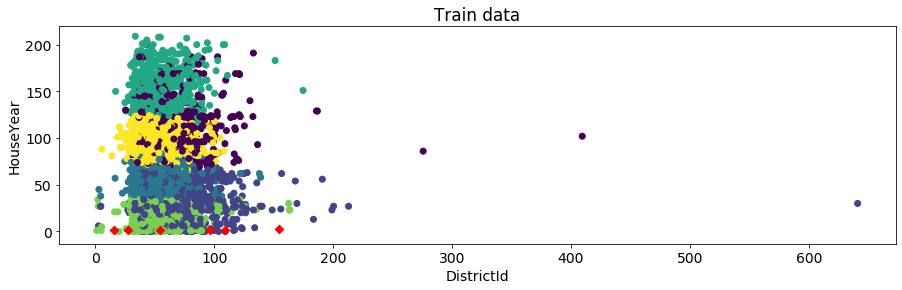

In [150]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(X['Square'], X['DistrictId'], c=X_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('DistrictId')
plt.ylabel('HouseYear')

plt.title('Train data')

In [ ]:
# разобьем наш датасет , презназначенный для обучения колонки LifeSquare на два датасета (обучающего и валидного)
X_train_ls, X_valid_ls, y_train_ls, y_valid_ls = train_test_split(X_scaled, y, test_size=0.3, random_state=50)

In [ ]:
###Агломеративная кластеризация
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
model = AgglomerativeClustering(n_clusters=3)

scaler = MinMaxScaler()

train_labels = model.fit_predict(X_scaled)

plt.scatter(train['x'], train['y'], c=train_labels)

Попытаем обучить наш датасет с пропущенными значениями LifeSquare

In [1414]:
# на графике мы видим выбросы  по колонке Square , о
df[df['Square']>250]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366


In [1415]:
# и удалим некорректное значение (выброс > 6000) по колонке LifeSquare а также оставим NAN, чтобы из позже обучить
df_corrected=df[np.logical_or(df['LifeSquare']<6000, np.isnan(df['LifeSquare']))]
df_corrected.shape

KeyboardInterrupt: 

In [ ]:
# смотрим аномальные  значения когда жилая площать больше или равна  Общей, 
# Такие строки я считаю некорректными но их много = 481 , поэтому оставим
df_corrected[df_corrected['LifeSquare']>=df_corrected['Square']]

In [ ]:
# columns_ls это колонки , которые будут учавствовать в обучении LifeSquare
columns_ls =['DistrictId', 'Rooms','Square','KitchenSquare','HouseFloor', 'HouseYear']

In [ ]:
# df_ls это датасет  train с ненулевыми значениями в колонке LifeSquare (а также там удален некорректный 1 выброс)
df_notNan_ls=df_corrected[df_corrected['LifeSquare'].notnull()]
df_notNan_ls.shape

In [ ]:
X=df_notNan_ls[columns_ls]
X

In [ ]:
y=df_notNan_ls['LifeSquare']
y

In [ ]:
# Стандартизируем значения колонок , который выбрали для обучения LifeSquare в датасет Ч
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# убрал скалеры так как все скалеры дают абсолютно одинаковый реузальтат что и без него
#scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler = RobustScaler()

X_scaled=scaler.fit_transform(X)
#X_scaled=X
X_scaled=pd.DataFrame(X_scaled, columns=columns_ls)
X_scaled

In [ ]:
# разобьем наш датасет , презназначенный для обучения колонки LifeSquare на два датасета (обучающего и валидного)
X_train_ls, X_valid_ls, y_train_ls, y_valid_ls = train_test_split(X_scaled, y, test_size=0.3, random_state=50)

In [ ]:
X_train_ls

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
lr = LinearRegression()

In [ ]:
# обучили модель и получили y_pred_ls
lr.fit(X_train_ls, y_train_ls)
y_pred_ls = lr.predict(X_train_ls)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# получим метрику r2 по качеству обучения   0.5488224338187244
r2_score(y_train_ls, y_pred_ls)


In [ ]:
y_pred_valid_ls = lr.predict(X_valid_ls)
r2_score(y_valid_ls, y_pred_valid_ls)

In [ ]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train_ls, y_train_ls)

y_pred_ls = lasso.predict(X_train_ls)
# 0.6672347403504433
r2_score(y_train_ls, y_pred_ls)

In [ ]:
lasso.fit(X_valid_ls, y_valid_ls)
y_valid_pred_ls = lasso.predict(X_valid_ls)
r2_score(y_valid_ls, y_valid_pred_ls)

In [ ]:
#  График изменения метрик r2  при увеличении коэффициента регуляризации alpha (LASSO)
n = 50
coeffs = np.zeros((n, len(columns_ls)))
r2_train=np.zeros(n)
r2_valid=np.zeros(n)
alpha_list = np.logspace(-3, 1, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train_ls, y_train_ls)
    y_pred_ls = lasso.predict(X_train_ls)
    y_valid_pred_ls = lasso.predict(X_valid_ls)
    
    r2_train[i]=r2_score(y_train_ls, y_pred_ls)
    r2_valid[i]=r2_score(y_valid_ls, y_valid_pred_ls)
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(len(columns_ls)):
    plt.plot(alpha_list, r2_train)
    plt.plot(alpha_list, r2_valid)

plt.title('изменение метрик r2  при увеличении коэффициента регуляризации alpha (Lasso)')

plt.xlabel('alpha')
plt.ylabel('R2 метрика')

plt.legend(columns_ls)

In [ ]:
#  График изменения метрик r2  при увеличении коэффициента регуляризации alpha (Ridge)
n = 50

coeffs = np.zeros((n, len(columns_ls)))
alpha_list = np.logspace(-3, 2, n)
r2_train=np.zeros(n)
r2_valid=np.zeros(n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val)
    ridge.fit(X_train_ls, y_train_ls)
    
    y_pred_ls = ridge.predict(X_train_ls)
    y_valid_pred_ls = ridge.predict(X_valid_ls)
    coeffs[i, :] = ridge.coef_.flatten()
    r2_train[i]=r2_score(y_train_ls, y_pred_ls)
    r2_valid[i]=r2_score(y_valid_ls, y_valid_pred_ls)
    
for i in range(len(columns_ls)):
    plt.plot(alpha_list, r2_train)
    plt.plot(alpha_list, r2_valid)

plt.title('изменение метрик r2  при увеличении коэффициента регуляризации alpha (Ridge)')

plt.xlabel('alpha')
plt.ylabel('r2 метрика')

plt.legend(columns_ls)

In [ ]:
ridge = Ridge(alpha=1)

ridge.fit(X_train_ls, y_train_ls)
y_pred_ls = ridge.predict(X_train_ls)
# 0.667292086849927   100000
r2_score(y_train_ls, y_pred_ls)

In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_valid_ls, y_valid_ls)
y_valid_pred_ls = ridge.predict(X_valid_ls)
r2_score(y_valid_ls, y_valid_pred_ls)

In [ ]:
# восстанвливаем отстандартизированные данный в первоначальные значения 
X_train_ls_unscaled=pd.DataFrame(scaler.inverse_transform(X_train_ls), columns=columns_ls)
# X_train_ls_unscaled=X_train_ls
X_train_ls_unscaled

In [ ]:
# сравним полученный значения и исходными правильными
check_test = pd.DataFrame({
    'id':y_train_ls.index,
    "square_train_ls":X_train_ls_unscaled['Square'].values,
    "y_train_ls":y_train_ls,
    "y_pred_ls": y_pred_ls.flatten(),
})
check_test

In [ ]:
# построим график  между обученными и правильныит решениями

plt.scatter(y_train_ls, y_pred_ls)

In [ ]:
a=y_train_ls<80
plt.scatter(y_train_ls[a], y_pred_ls[a], alpha=0.3 ,c='red')


In [ ]:
# получим метрику F1 по качеству обучения   0.5488224338187244
r2_score(y_train_ls, y_pred_ls)

In [ ]:
lr.fit(X_valid_ls, y_valid_ls)
y_valid_pred_ls = lr.predict(X_valid_ls)

In [ ]:
r2_score(y_valid_ls, y_valid_pred_ls)

### Support Vector Machine

In [ ]:
# так как метрика по обучающимся данным уже очень низкая_ нат смыла обучать валидную часть   0.5488224338187244
# пытаемся посотоить Support Vector Machine

from sklearn.svm import SVR

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
#X_scaled=X
X_scaled=pd.DataFrame(X_scaled, columns=columns_ls)
X_scaled

In [ ]:
X_train_ls, X_valid_ls, y_train_ls, y_valid_ls = train_test_split(X_scaled, y, test_size=0.3, random_state=50)


svr = SVR(gamma='auto')

svr.fit(X_train_ls, y_train_ls)

In [ ]:
y_pred_ls = svr.predict(X_train_ls)
r2_score(y_train_ls, y_pred_ls)


In [ ]:
# сравним полученный значения и исходными правильными
check_test = pd.DataFrame({
    'id':y_train_ls.index,
    "square_train_ls":X_train_ls_unscaled['Square'].values,
    "y_train_ls":y_train_ls,
    "y_pred_ls": y_pred_ls.flatten(),
})
check_test

In [ ]:
y_valid_pred_ls = svr.predict(X_valid_ls)
r2_score(y_valid_ls, y_valid_pred_ls)



### SVM без тюнинга показала себя крайне не эффективной моделью c метрикой R2 =0.14 

### Тюнинг модели SVC

In [ ]:

c_values = np.logspace(1, 5, 10)

r2_valid = []
r2_train = []

for i, value in enumerate(c_values):
    svr = SVR(C=value, gamma="auto")
    print(i)
    svr.fit(X_train_ls, y_train_ls)
   
    
    y_pred_ls = svr.predict(X_train_ls)
    y_valid_pred_ls = svr.predict(X_valid_ls)
    r2_train.append(r2_score(y_train_ls, y_pred_ls))
    r2_valid.append(r2_score(y_valid_ls, y_valid_pred_ls))
    

In [ ]:
r2_valid_max = max(r2_valid)   # максимальное значение accuracy_on_valid
index_r2_valid_max= r2_valid.index(r2_valid_max)  # индекс максимального значения accuracy_on_valid 
c_value_max=c_values[index_r2_valid_max]   # значение c_value в масимальной точке accuracy_on_valid_Max
r2_train_max=r2_train[index_r2_valid_max] # максимальное значение accuracy_on_train в точке c_value_max

print (f"c_value_max: {c_value_max}, r2_valid_max: {r2_valid_max}, r2_train_max: {r2_train_max}" )


In [ ]:
plt.plot(c_values, r2_train, label="r2_train")
plt.plot(c_values, r2_valid, label="r2_valid")

plt.xlabel('Значение параметра C')
plt.ylabel('r2')

plt.text(c_value_max, 0.4, round(c_value_max, 4) )
plt.axvline(c_value_max, 0, 1, label='c_value_max', c='red', linestyle="--")
plt.text(c_value_max, r2_valid_max, round(r2_valid_max, 4) )
plt.text(c_value_max, r2_train_max, round(r2_train_max, 4) )

plt.legend()
plt.grid()


plt.show()

In [ ]:
# подстаdляем  в SVR найденное значение С- value

svr = SVR(C=12915, gamma='auto')
svr.fit(X_train_ls, y_train_ls)
y_pred_ls = svr.predict(X_train_ls)
r2_score(y_train_ls, y_pred_ls)

In [ ]:
y_valid_pred_ls = svr.predict(X_valid_ls)
r2_score(y_valid_ls, y_valid_pred_ls)

### SVM показала R2 метрику  train (0.6758937449850086)  и valid  0.441107967795651

### это немного хуже чем линейная регрессия


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y_valid_pred_ls = regr.predict(X_valid_ls)
r2_score(y_valid_ls, y_valid_pred_ls)

In [ ]:
parameters = {
    'n_estimators': [50, 100, 150],
    'max_features': np.arange(1, 6),
    'max_depth': np.arange(8, 12),
}

regr = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)
regr

In [ ]:
regr.fit(X_train_ls, y_train_ls)
y_pred_ls = regr.predict(X_train_ls)
r2_score(y_train_ls, y_pred_ls)



In [ ]:
y_valid_pred_ls = regr.predict(X_valid_ls)
r2_score(y_valid_ls, y_valid_pred_ls)


In [ ]:
regr.best_params_

In [ ]:
regr = RandomForestRegressor(max_depth=10, n_estimators=100, max_features=5, random_state=50)
regr.fit(X_train_ls, y_train_ls)
y_pred_ls = regr.predict(X_train_ls)
r2_score(y_train_ls, y_pred_ls)

In [ ]:
y_valid_pred_ls = regr.predict(X_valid_ls)
r2_score(y_valid_ls, y_valid_pred_ls)

In [ ]:
cv_results = pd.DataFrame(regr.cv_results_)

cv_results.columns

# ФИНАЛ

In [1433]:
X1=df_corrected.drop('Price', axis=1).copy()
X1=pd.get_dummies(X1)
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 14038 to 6306
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     9999 non-null   int64  
 1   Rooms          9999 non-null   float64
 2   Square         9999 non-null   float64
 3   LifeSquare     7886 non-null   float64
 4   KitchenSquare  9999 non-null   float64
 5   Floor          9999 non-null   int64  
 6   HouseFloor     9999 non-null   float64
 7   HouseYear      9999 non-null   int64  
 8   Ecology_1      9999 non-null   float64
 9   Social_1       9999 non-null   int64  
 10  Social_2       9999 non-null   int64  
 11  Social_3       9999 non-null   int64  
 12  Healthcare_1   5202 non-null   float64
 13  Helthcare_2    9999 non-null   int64  
 14  Shops_1        9999 non-null   int64  
 15  Ecology_2_A    9999 non-null   uint8  
 16  Ecology_2_B    9999 non-null   uint8  
 17  Ecology_3_A    9999 non-null   uint8  
 18  Ecol

In [1434]:
#X=X1[['DistrictId', 'Rooms', 'Square', 'KitchenSquare','HouseFloor','HouseYear','Ecology_1','Social_1', 'Social_2','Social_3','Helthcare_2','Shops_1','Ecology_2_A','Ecology_2_B','Ecology_3_A','Ecology_3_B','Shops_2_A','Shops_2_B']]
X=X1[['DistrictId', 'Rooms', 'Square', 'KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_1', 'Social_2','Social_3','Helthcare_2']]

X

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2
Id,,,,,,,,,,,,
14038,35,2.0,47.981561,6.0,7,9.0,1969,0.089040,33,7976,5,0
15053,41,3.0,65.683640,8.0,7,9.0,1978,0.000070,46,10309,1,1
4765,53,2.0,44.947953,0.0,8,12.0,1968,0.049637,34,7759,0,1
5809,58,2.0,53.352981,9.0,8,17.0,1977,0.437885,23,5735,3,0
10783,99,1.0,39.649192,7.0,11,12.0,1976,0.012339,35,5776,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
77,32,2.0,50.401785,5.0,6,5.0,1968,0.135650,46,7960,6,3
6159,18,1.0,41.521546,9.0,13,13.0,2000,0.000000,30,5562,0,0
5123,27,1.0,47.939008,1.0,12,16.0,2015,0.072158,2,629,1,0


In [1435]:
y=df_corrected['Price']
y

Id
14038    184966.930730
15053    300009.450063
4765     220925.908524
5809     175616.227217
10783    150226.531644
             ...      
77       196684.316040
6159     189050.289571
5123     159143.805370
5400     181595.339808
6306     218714.077615
Name: Price, Length: 9999, dtype: float64

In [1438]:
# разобьем наш датасет , презназначенный для обучения колонки LifeSquare на два датасета (обучающего и валидного)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=50)
X_train

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2
Id,,,,,,,,,,,,
1617,85,1.0,36.974018,6.0,1,9.0,1979,0.037178,52,11217,1,1
4681,27,2.0,66.495324,1.0,5,4.0,1977,0.072158,2,629,1,0
16614,61,2.0,55.199379,8.0,8,12.0,1985,0.300323,52,10311,6,1
169,9,1.0,44.716015,1.0,7,18.0,2017,0.161532,25,5648,1,2
16363,90,2.0,48.312779,8.0,13,12.0,1971,0.265089,37,5288,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4938,6,1.0,42.363561,1.0,9,17.0,1977,0.243205,5,1564,0,0
8671,47,2.0,47.280566,6.0,13,12.0,1976,0.101872,23,4583,3,3
982,30,2.0,65.933267,1.0,5,17.0,2018,0.000078,22,6398,141,3


In [1439]:
from sklearn.ensemble import RandomForestRegressor
parameters = {
    'n_estimators': [100, 150,200],
    'max_features': np.arange(3, 6),
    'max_depth': np.arange(10, 12),
}

regr = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)
regr

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
r2_score(y_train, y_pred)

In [ ]:
#regr = RandomForestRegressor(max_depth=11, n_estimators=150, max_features=3, random_state=50)
#regr.fit(X_train, y_train)
#y_pred = regr.predict(X_train)
#r2_score(y_train, y_pred)

In [ ]:
y_valid_pred = regr.predict(X_valid)
r2_score(y_valid, y_valid_pred)

In [ ]:
regr.best_params_